<a href="https://colab.research.google.com/github/Kotarosz727/my_python/blob/main/01_%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%81%AE%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np

In [116]:
x = np.array([[1], [2], [3]])
print(x)

[[1]
 [2]
 [3]]


In [117]:
X = np.array([[1,2], [3,4]])
print(X)

[[1 2]
 [3 4]]


In [118]:
# 転置
Xt = X.T
print(Xt)

[[1 3]
 [2 4]]


In [119]:
# 逆行列
# linear algebra:線形代数
X_inv = np.linalg.inv(X)
print(X_inv)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [120]:
# 行列積
np.dot(X, X_inv)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

# **Scikit-learnでの実装**

In [121]:
import sklearn

In [122]:
X = np.array([
      [1,2,3],
      [1,2,5],
      [1,3,4],
      [1,5,9]
     ])
print(X)

[[1 2 3]
 [1 2 5]
 [1 3 4]
 [1 5 9]]


In [123]:
y = np.array([
              [1],
              [5],
              [6],
              [8]
])
print(y)

[[1]
 [5]
 [6]
 [8]]


In [124]:
# 重回帰分析のみ読み込み
from sklearn.linear_model import LinearRegression

In [125]:
# モデルの宣言
# model = LinearRegression()
model = LinearRegression(fit_intercept=False)

In [126]:
# モデルの学習←パラメーターの調整
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [127]:
model.coef_

array([[-0.14285714,  0.71428571,  0.57142857]])

In [128]:
model.intercept_

0.0

In [129]:
# 予測精度←決定係数
model.score(X, y)

0.6923076923076924

In [130]:
# 予測値の計算
x = np.array([
              [1,2,3]
])

In [131]:
y_pred = model.predict(x)
y_pred

array([[3.]])

# **実データを使って計測**

In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('/content/housing.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [134]:
# レコード数の確認
len(df)

506

In [135]:
df.describe()
# memo: countを見て値が異なる列があれば欠損していることが分かる

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **分布の確認**

In [136]:
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


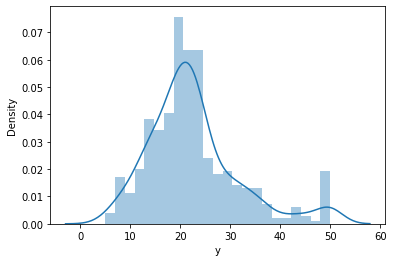

In [137]:
sns.distplot(df['y'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


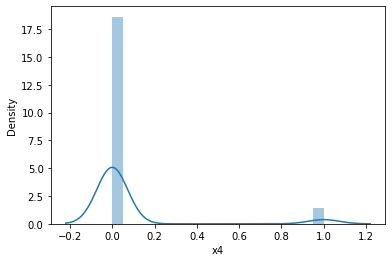

In [138]:
sns.distplot(df['x4'], bins=20)

# **相関関係の確認**

In [139]:
# 相関係数(correlation)の算出 
# 絶対値として1に近いかどうか
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
x6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
x7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
x8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
x9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
x10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


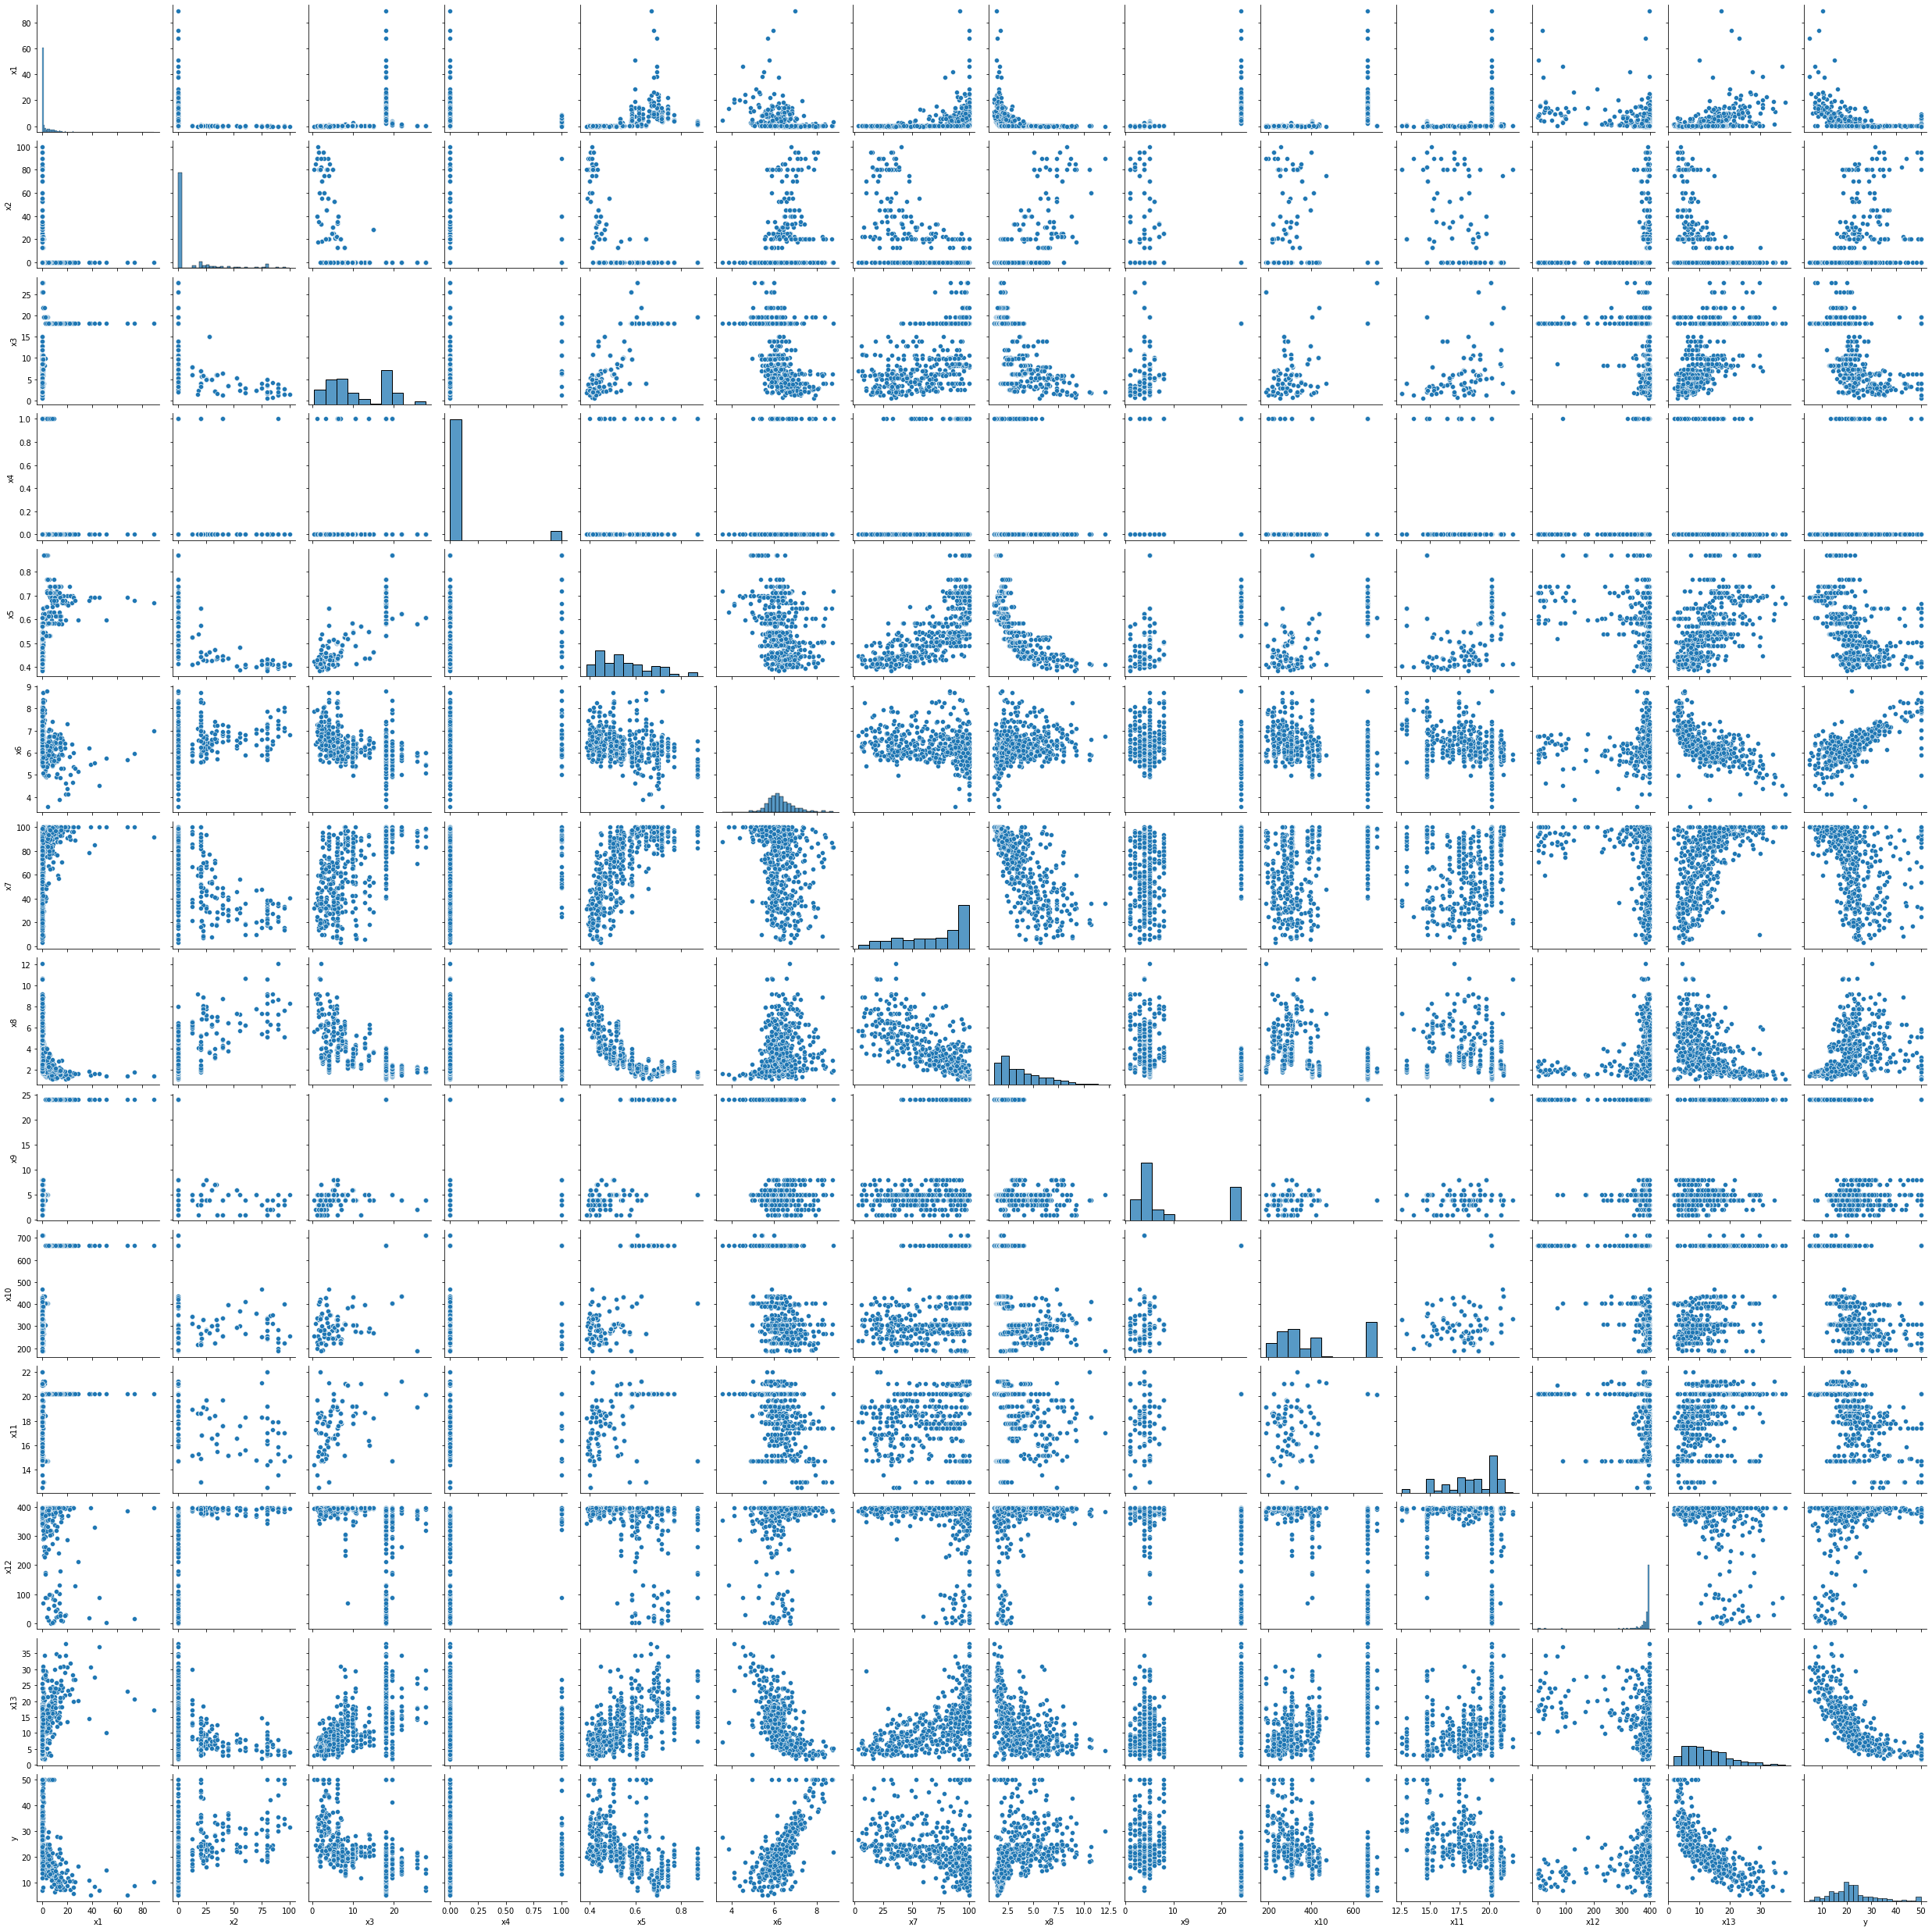

In [140]:
# 相関関係をビジュアライズ
sns.pairplot(df)
# memo:x6（正の相関）,x13（負の相関）で、相関係数も高く強い相関がある。それ以外が無相関

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


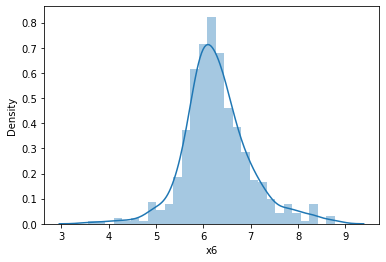

In [141]:
sns.distplot(df['x6'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


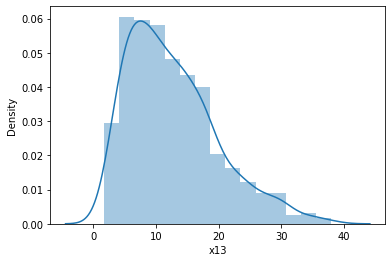

In [142]:
sns.distplot(df['x13'])

# **入力変数と出力変数の切り分け**

In [143]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [144]:
# df.iloc[行,列]
df.iloc[0,0]

0.00632

In [145]:
X = df.iloc[:, :-1]
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [146]:
y = df.iloc[:, -1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: y, Length: 506, dtype: float64

# **モデルの構築と検証**

In [147]:
model = LinearRegression()

In [148]:
# 学習
model.fit(X, y)

LinearRegression()

In [149]:
# 検証
model.score(X,y)

0.7406426641094094

# **訓練データと検証データ**

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
# 40%をテストで使用
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=1)

In [152]:
# 学習
model.fit(X_train, y_train)

LinearRegression()

In [153]:
# 検証 (テストデータ）
model.score(X_test, y_test)

0.7209056672661757

In [154]:
# 検証 (トレインデータ)
model.score(X_train, y_train)

0.7468316520140627

# **予測値の計算**

In [155]:
x = X.iloc[0, :]
x

x1       0.00632
x2      18.00000
x3       2.31000
x4       0.00000
x5       0.53800
x6       6.57500
x7      65.20000
x8       4.09000
x9       1.00000
x10    296.00000
x11     15.30000
x12    396.90000
x13      4.98000
Name: 0, dtype: float64

In [156]:
y_pred = model.predict([x])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


29.423688469405562

# **モデルの保存**

In [157]:
!pip install joblib

In [158]:
import joblib

In [160]:
joblib.dump(model, 'model.pkl')

['model.pkl']

# **パラメーターの確認**

In [161]:
# パラメーターwの値
model.coef_

array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01])

In [162]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


wの値だけでは影響が判らない